<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [import data](#data_import)
2. [data visualization](#visualization)
3. [data cleaning](#cleaning)
4. [data preparation](#preparation)
5. [Benchmark model](#benchmark_model)<br>
    5.1. [Train-test split](#train_test_split)<br>

4. [data preparation](#model_training)


0. index

### 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1. import data <a id='data_import'></a>
[Back to top](#table_of_contents)

In [3]:
taxi_25=pd.read_parquet('data/yellow_tripdata_2025-01.parquet')
taxi_data=pd.concat([taxi_25])

### 2. data visualization & exploration <a id='visualization'></a>
[Back to top](#table_of_contents)

In [4]:
taxi_25.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0


In [5]:
taxi_25.shape

(3475226, 19)

In [6]:
taxi_25.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [7]:
taxi_data=taxi_25[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID','PULocationID',
       'DOLocationID', 'payment_type',  'total_amount']]

In [8]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,18.00
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,12.12
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,12.10
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,9.70
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,8.30


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

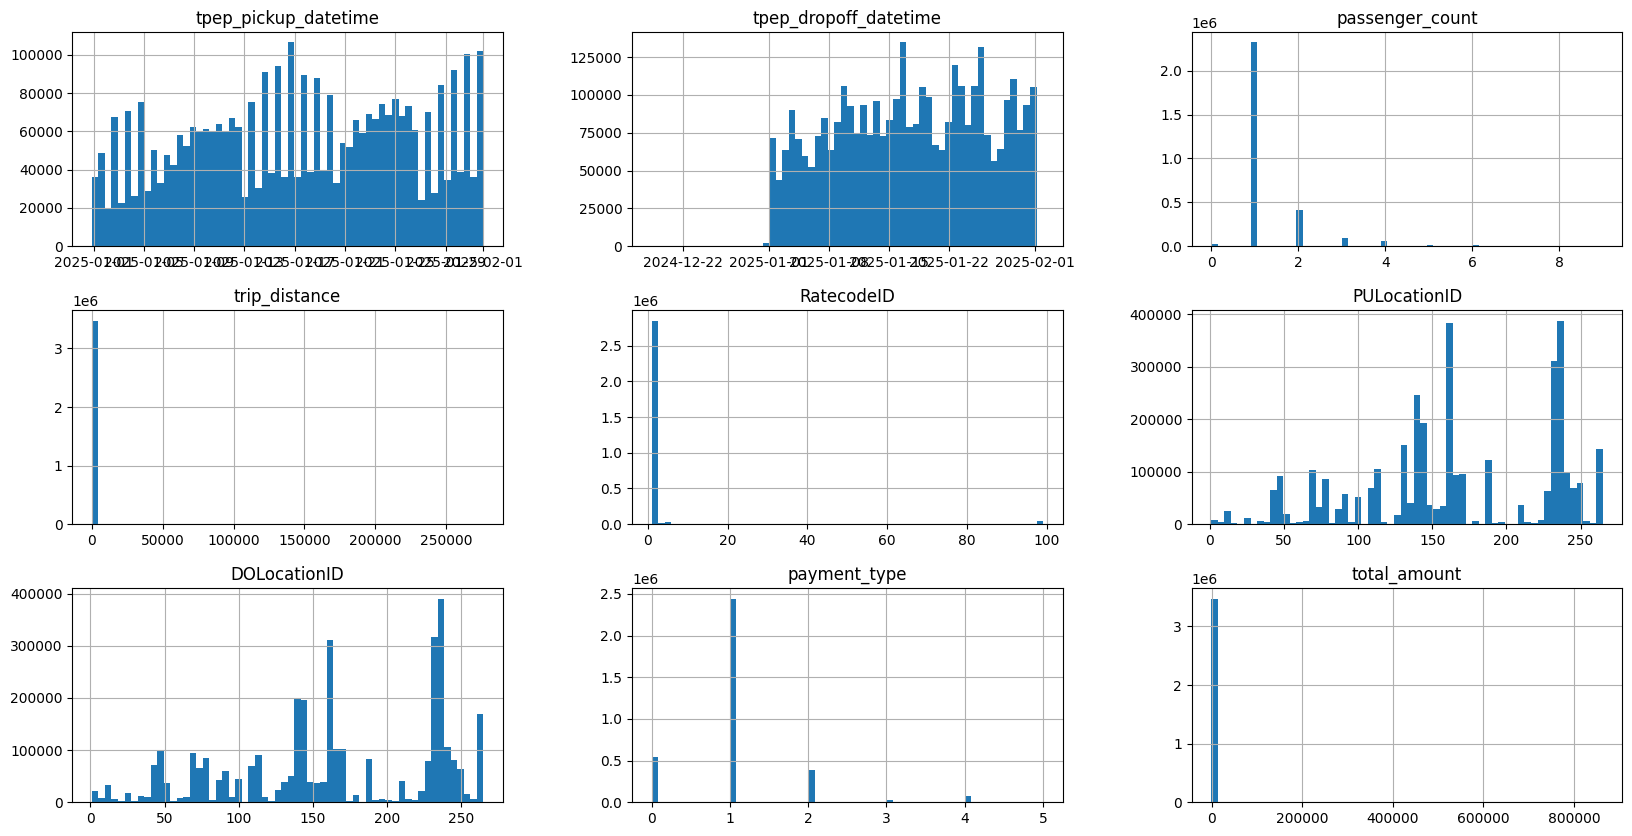

In [9]:


taxi_data.hist(figsize=(20,10), bins=60)



In [10]:
taxi_data['RatecodeID'].value_counts()


RatecodeID
1.0     2756472
2.0       94420
99.0      41963
5.0       26501
3.0        8622
4.0        7092
6.0           7
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

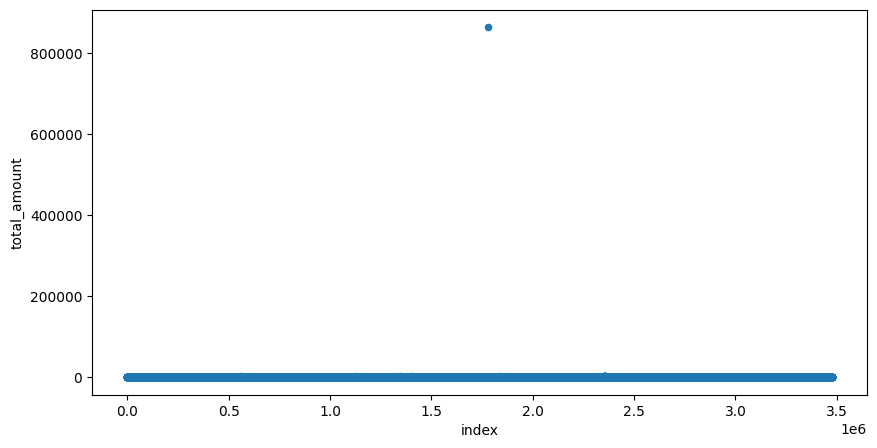

In [11]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

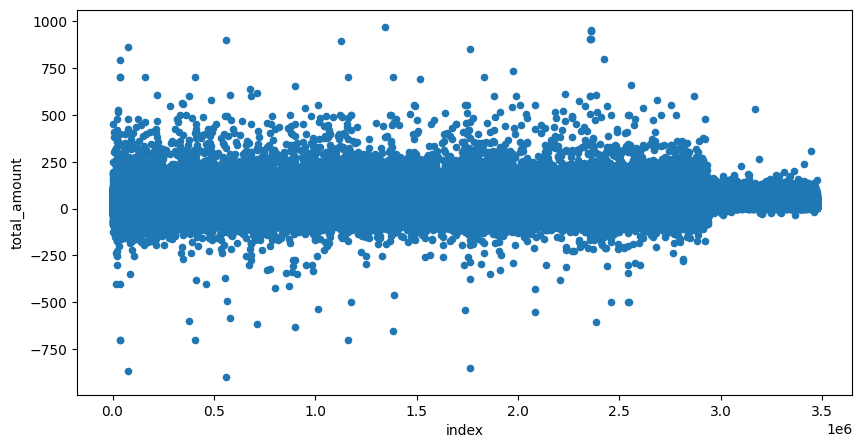

In [12]:
taxi_data[taxi_data['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))


negative value

(63037, 9)


,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,17,2025-01-01 00:01:41,2025-01-01 00:07:14,1.0,0.71,1.0,79,107,2,-8.54
1,22,2025-01-01 00:55:54,2025-01-01 01:00:38,1.0,0.69,1.0,137,233,4,-11.50
2,104,2025-01-01 00:56:12,2025-01-01 01:15:00,1.0,0.97,1.0,161,170,4,-21.30
3,149,2025-01-01 00:55:53,2025-01-01 01:06:49,1.0,1.42,1.0,79,45,2,-17.10
4,202,2025-01-01 00:29:35,2025-01-01 00:36:02,1.0,0.60,1.0,79,148,4,-12.20
...,...,...,...,...,...,...,...,...,...,...
63032,3248636,2025-01-21 18:33:45,2025-01-21 18:51:10,NaN,2.25,NaN,231,107,0,-23.33
63033,3292466,2025-01-23 17:38:41,2025-01-23 17:46:47,NaN,0.00,NaN,137,186,0,-17.47
63034,3299623,2025-01-23 20:53:11,2025-01-23 21:04:29,NaN,3.90,NaN,233,232,0,-22.49
63035,3366645,2025-01-26 02:23:57,2025-01-26 02:47:25,NaN,4.82,NaN,255,188,0,-33.82


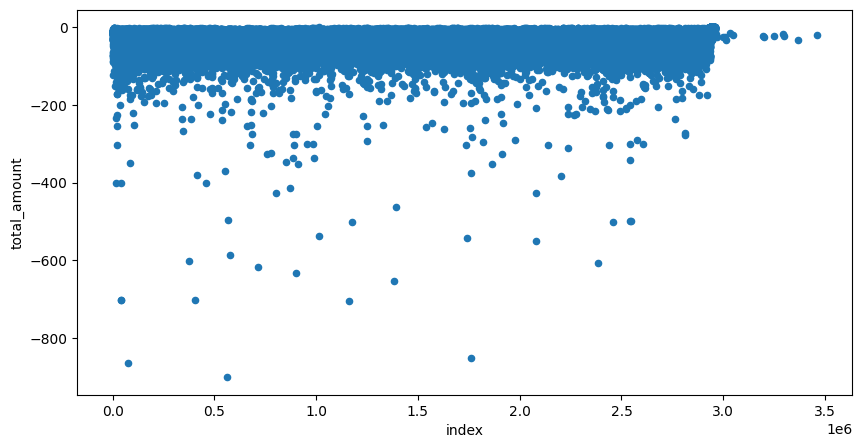

In [17]:
#first check negative the data before dlete them
print(taxi_data[taxi_data['total_amount']<0].shape)
taxi_data[taxi_data['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))
taxi_data[taxi_data['total_amount']<0].reset_index()

In [18]:
taxi_data[taxi_data['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
17,2025-01-01 00:01:41,2025-01-01 00:07:14,1.0,0.71,1.0,79,107,2,-8.54
22,2025-01-01 00:55:54,2025-01-01 01:00:38,1.0,0.69,1.0,137,233,4,-11.50
104,2025-01-01 00:56:12,2025-01-01 01:15:00,1.0,0.97,1.0,161,170,4,-21.30
149,2025-01-01 00:55:53,2025-01-01 01:06:49,1.0,1.42,1.0,79,45,2,-17.10
202,2025-01-01 00:29:35,2025-01-01 00:36:02,1.0,0.60,1.0,79,148,4,-12.20


In [19]:
taxi_data[taxi_data['total_amount']<0]['payment_type'].value_counts()

payment_type
4    37410
2    14111
3     8080
0     3421
1       15
Name: count, dtype: int64

<Axes: >

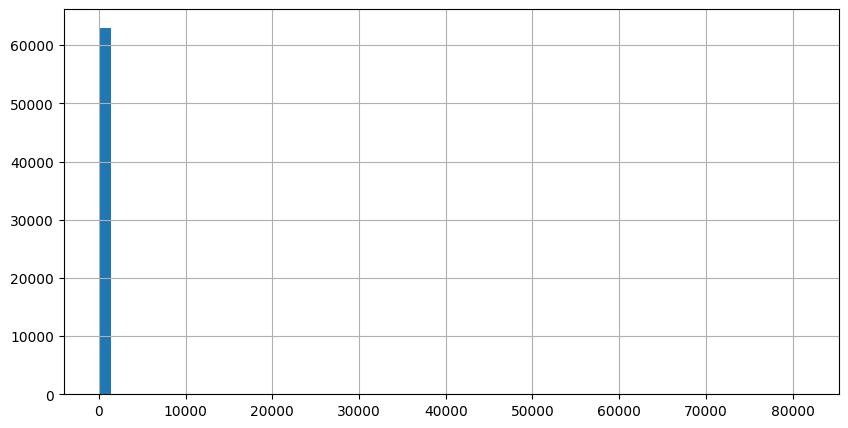

In [20]:
taxi_data[taxi_data['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

<Axes: xlabel='index', ylabel='trip_distance'>

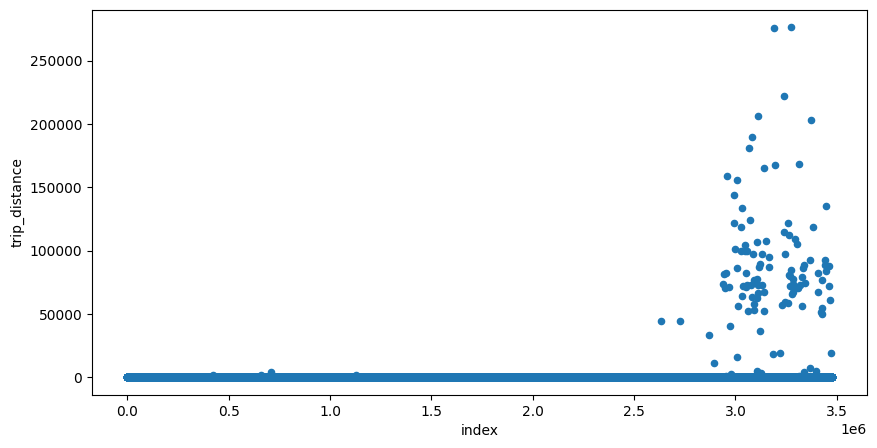

In [21]:
taxi_data.reset_index().plot(kind='scatter', y='trip_distance', x='index', figsize=(10,5))

In [22]:
print(taxi_data[taxi_data['total_amount']==0].shape)
taxi_data[taxi_data['total_amount']==0].head()


(559, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
10261,2025-01-01 01:30:13,2025-01-01 01:30:31,1.0,0.00,1.0,226,226,2,0.0
18189,2025-01-01 03:57:21,2025-01-01 04:02:26,1.0,0.40,1.0,158,125,3,0.0
19155,2025-01-01 03:27:25,2025-01-01 03:43:43,1.0,3.50,1.0,144,163,4,0.0
21300,2025-01-01 04:03:25,2025-01-01 04:11:42,2.0,4.69,1.0,255,97,2,0.0
21920,2025-01-01 04:24:55,2025-01-01 04:29:57,4.0,1.72,1.0,7,7,2,0.0


In [23]:
taxi_data[taxi_data['total_amount']==0]['payment_type'].value_counts()

payment_type
4    238
3    155
1     78
0     47
2     40
5      1
Name: count, dtype: int64

<Axes: >

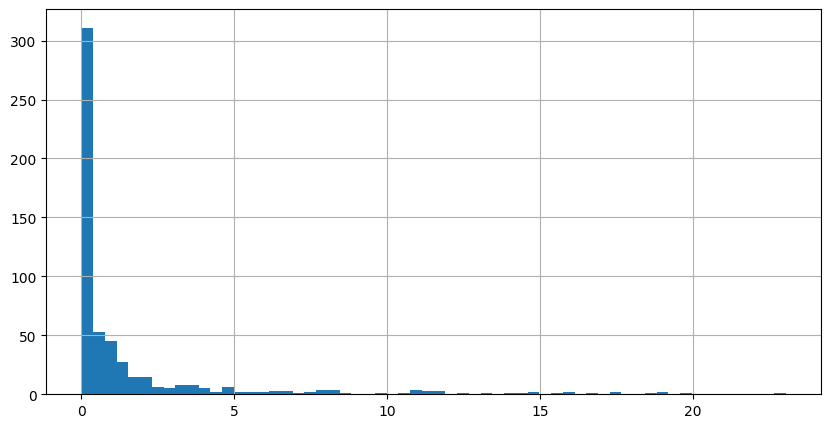

In [24]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [25]:
taxi_data[taxi_data['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     262
0.10      19
0.50      17
0.40      15
0.30      14
        ... 
1.46       1
6.60       1
1.72       1
1.45       1
14.68      1
Name: count, Length: 112, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

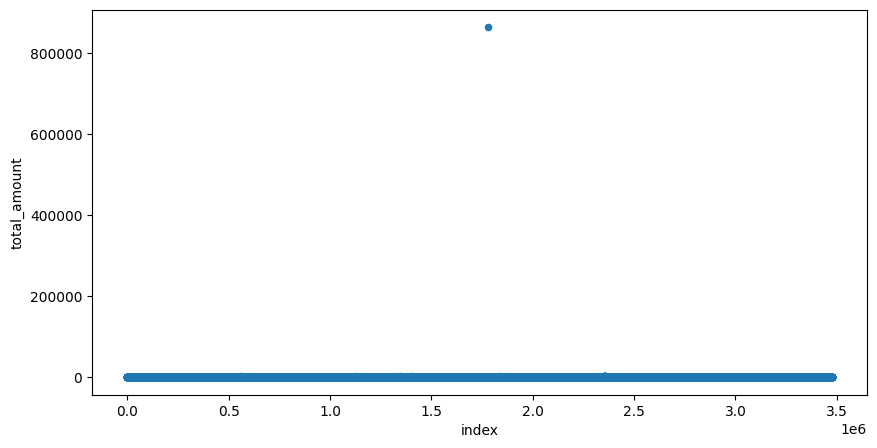

In [27]:
taxi_data.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [28]:
taxi_data[taxi_data['total_amount']>100].shape

(44612, 9)

In [29]:
taxi_data[taxi_data['total_amount']>200].shape

(1913, 9)

In [30]:
taxi_data[taxi_data['total_amount']>300].shape

(558, 9)

In [31]:
taxi_data[['total_amount']].mean()

total_amount    25.611292
dtype: float64

### 3. data cleaning <a id='cleaning'></a>
[Back to top](#table_of_contents)

In [32]:
taxi_data_filtered = taxi_data[(taxi_data['total_amount']>=0)&(taxi_data['total_amount']<200)]

In [33]:
print(taxi_data.shape)
taxi_data_filtered.shape

(3475226, 9)


(3410271, 9)

In [34]:
taxi_data_filtered = taxi_data[(taxi_data['passenger_count']>=0)]

In [35]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

### 4. data preparation <a id='preparation'></a>
[Back to top](#table_of_contents)

deep copy

In [36]:
taxi_data_prepared = taxi_data_filtered.copy()

verfication differents types

In [37]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [38]:
taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:,'payment_type']   = taxi_data_prepared['payment_type'].astype(str)
taxi_data_prepared.loc[:,'DOLocationID']   = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:,'PULocationID']   = taxi_data_prepared['PULocationID'].astype(str)

/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/645734407.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'RatecodeID']   = taxi_data_prepared['RatecodeID'].astype(str)
/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/645734407.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '1' ... '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:,'payment_type']   = taxi_data_prepared['payment_type'].astype(str)
/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/645734407.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a 

In [39]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

Transforming variables into the formats we need them

In [40]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,18.00
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,12.12
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,12.10
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,9.70
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,8.30


In [41]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)

taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [42]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,229,237,1,18.00,2025-01-01,2025,1,1,0
1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,236,237,1,12.12,2025-01-01,2025,1,1,0
2,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,141,141,1,12.10,2025-01-01,2025,1,1,0
3,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,244,244,2,9.70,2025-01-01,2025,1,1,0
4,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,244,116,2,8.30,2025-01-01,2025,1,1,0


In [43]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year'] == 2025]

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

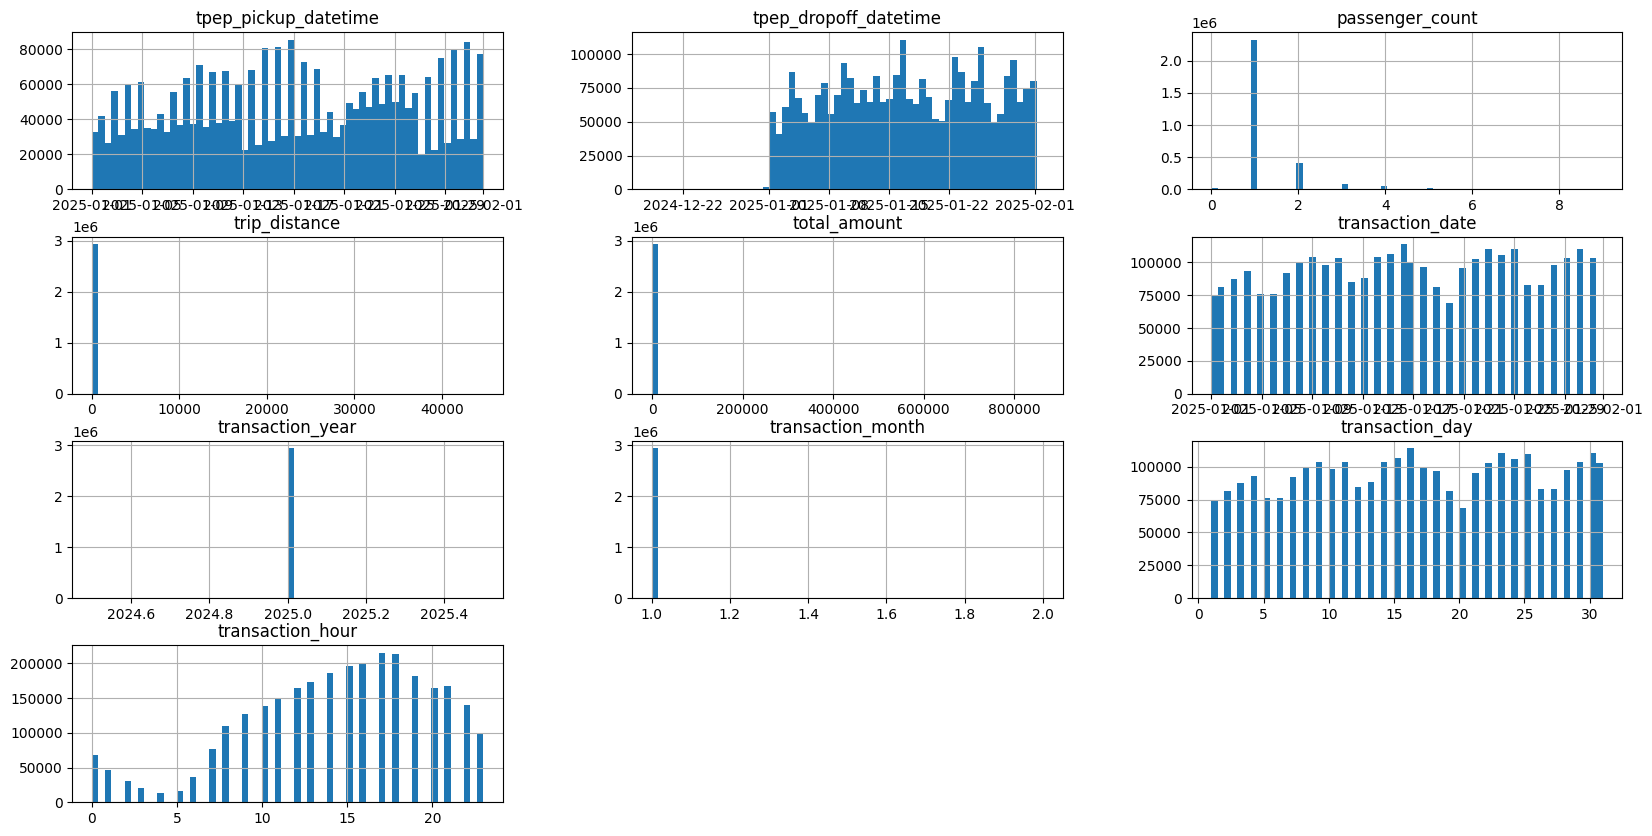

In [44]:


taxi_data_prepared.hist(figsize=(20,10), bins=60)



problem and data formualtion

In [45]:
categorical_columns = ['PULocationID','transaction_date','transaction_month','transaction_day','transaction_hour']
numerical_columns = ['trip_distance','total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [46]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2935056, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,229,2025-01-01,1,1,0,1.60,18.00
1,236,2025-01-01,1,1,0,0.50,12.12
2,141,2025-01-01,1,1,0,0.60,12.10
3,244,2025-01-01,1,1,0,0.52,9.70
4,244,2025-01-01,1,1,0,0.66,8.30


bring everything together that has the same 'PULocationID' & the same date and get the average of total amount and trip the distance

In [47]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(75971, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.10,115.000,1
1,1,2025-01-01,1,1,9,0.00,132.510,4
2,1,2025-01-01,1,1,12,0.00,106.200,2
3,1,2025-01-01,1,1,13,1.00,41.300,4
4,1,2025-01-01,1,1,14,2.16,70.205,2


<Axes: >

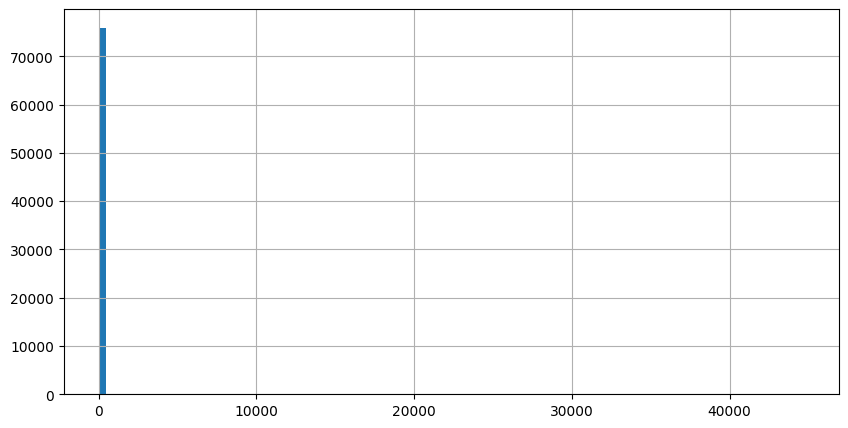

In [48]:
taxi_grouped_by_region['trip_distance'].hist(bins=100, figsize=(10,5))


<Axes: >

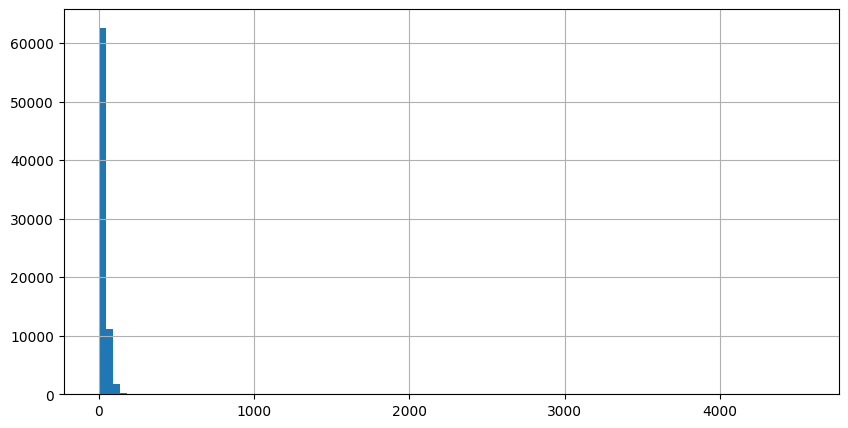

In [49]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

### 5. Benchmark Model <a id='benchmark'></a><br>
[Back to top](#table_of_contents)

In [50]:
data_for_benchmark_model=taxi_grouped_by_region.copy()

In [51]:
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.10,115.000,1
1,1,2025-01-01,1,1,9,0.00,132.510,4
2,1,2025-01-01,1,1,12,0.00,106.200,2
3,1,2025-01-01,1,1,13,1.00,41.300,4
4,1,2025-01-01,1,1,14,2.16,70.205,2
...,...,...,...,...,...,...,...,...
75966,98,2025-01-30,1,30,13,1.30,19.000,1
75967,98,2025-01-30,1,30,16,9.90,36.000,1
75968,98,2025-01-30,1,30,18,0.00,72.000,1
75969,98,2025-01-31,1,31,9,10.90,36.000,1


In [52]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark + ['trip_distance']
target_feature_benchmark  = 'total_amount'

### 5.1 train test split <a id='train_test_split'></a><br>


In [53]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

### 5.2. Fit a model to the data <a id='fit_model'></a>

In [54]:
from sklearn.tree import DecisionTreeRegressor

tree= DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b,y_train_b)

DecisionTreeRegressor(max_depth=10)

In [55]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 7.531405344957076
mean_squared_error 355.7768967860644
root_mean_squared_error 18.86204911418864
r2 0.36636260062614756


<Axes: xlabel='true', ylabel='pred'>

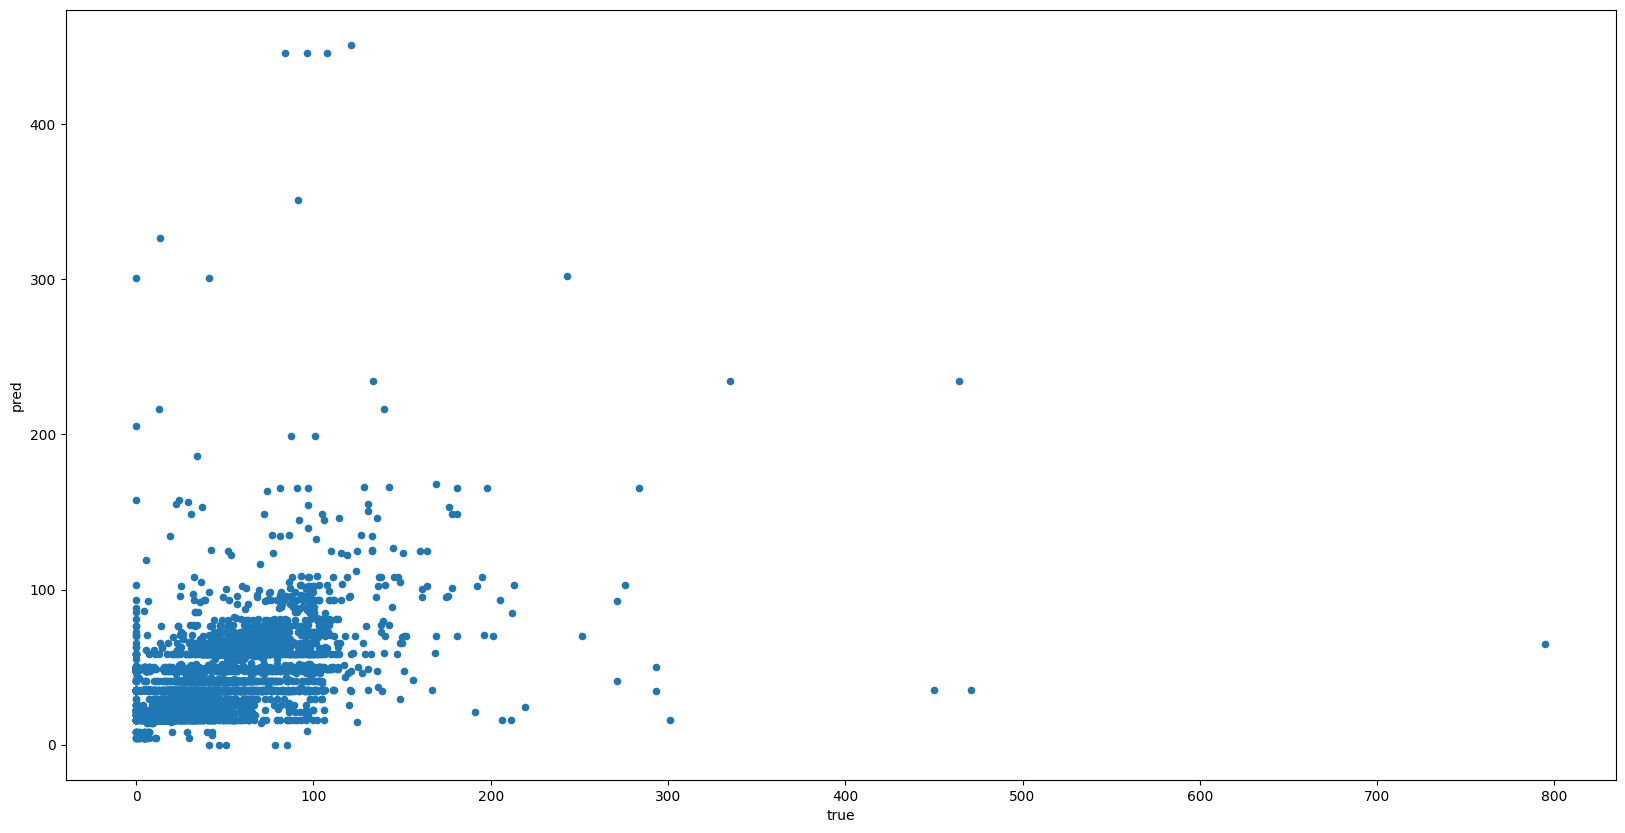

In [56]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

without `'trip_distance'`

In [57]:
categorical_features_benchmark = ['PULocationID','transaction_month','transaction_day','transaction_hour']
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = 'total_amount'

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_b, y_pred_b))
print('mean_squared_error', mean_squared_error(y_test_b, y_pred_b))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_b, y_pred_b)))
print('r2', r2_score(y_test_b, y_pred_b))

mean_absolute_error 12.798929843443114
mean_squared_error 497.01403126795583
root_mean_squared_error 22.29381150157944
r2 0.11752605695952911


<Axes: xlabel='true', ylabel='pred'>

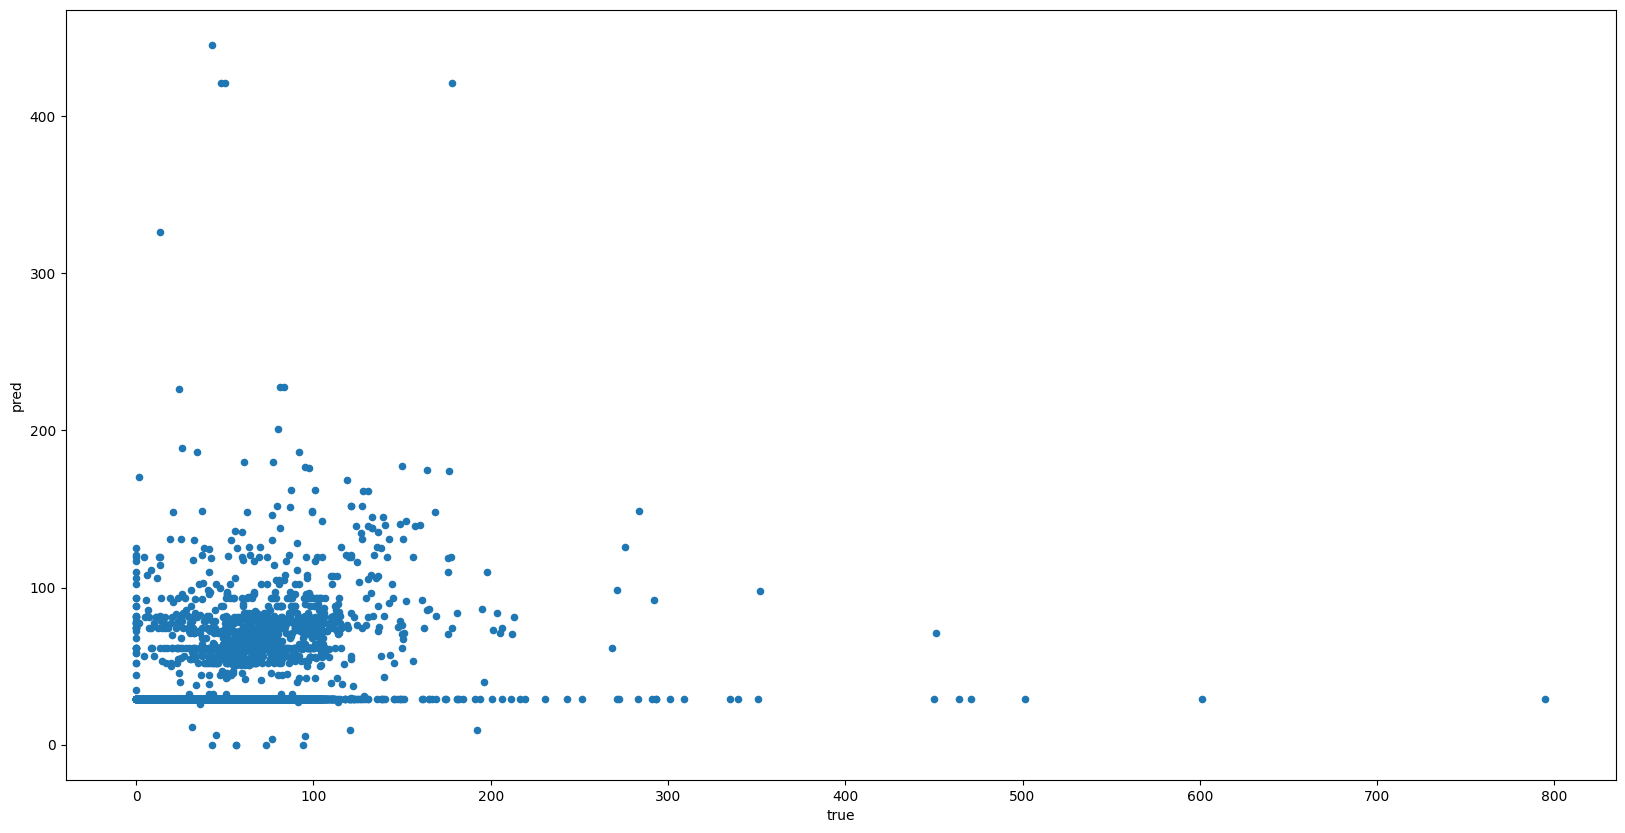

In [58]:
data = {'true': y_test_b, 'pred': y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### 6. Feature engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [59]:

data_with_new_features = taxi_grouped_by_region.copy()
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2025-01-01,1,1,6,0.10,115.000,1
1,1,2025-01-01,1,1,9,0.00,132.510,4
2,1,2025-01-01,1,1,12,0.00,106.200,2
3,1,2025-01-01,1,1,13,1.00,41.300,4
4,1,2025-01-01,1,1,14,2.16,70.205,2


**Date-related features**

In [60]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [61]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays= cal.holidays(start='2024',
                      end='2026').date
data_with_new_features['is_holiday']=data_with_new_features['transaction_date'].isin(holidays)


/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/2036515620.py:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday']=data_with_new_features['transaction_date'].isin(holidays)


In [62]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2025-01-01,1,1,6,0.10,115.000,1,2,False,True
1,1,2025-01-01,1,1,9,0.00,132.510,4,2,False,True
2,1,2025-01-01,1,1,12,0.00,106.200,2,2,False,True
3,1,2025-01-01,1,1,13,1.00,41.300,4,2,False,True
4,1,2025-01-01,1,1,14,2.16,70.205,2,2,False,True


**Date-related features**

In [63]:
zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [64]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2025-01-01,1,1,6,0.10,115.000,1,2,False,True,EWR
1,1,2025-01-01,1,1,9,0.00,132.510,4,2,False,True,EWR
2,1,2025-01-01,1,1,12,0.00,106.200,2,2,False,True,EWR
3,1,2025-01-01,1,1,13,1.00,41.300,4,2,False,True,EWR
4,1,2025-01-01,1,1,14,2.16,70.205,2,2,False,True,EWR


In [65]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        41423
Brooklyn         14133
Queens           13715
Bronx             5131
Unknown            685
EWR                230
Staten Island       83
Name: count, dtype: int64

weather

In [66]:
nyc_weather = pd.read_csv('data/nyc_weather.csv')
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [67]:
nyc_weather.shape

(2936, 6)

In [68]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [69]:
nyc_weather['cloud cover'].value_counts()

cloud cover
70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [70]:
nyc_weather['amount of precipitation'].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0            

In [71]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [72]:
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].replace('Trace of precipitation', 0.1)
nyc_weather['amount of precipitation'] = nyc_weather['amount of precipitation'].astype(float)

nyc_weather['amount of precipitation'].interpolate(inplace=True)

/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/2393814714.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc_weather['amount of precipitation'].interpolate(inplace=True)


In [73]:
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('70 – 80%.', 0.7)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('100%.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('20–30%.', 0.3)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('50%.', 0.5)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('no clouds', 0)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
nyc_weather['cloud cover'] = nyc_weather['cloud cover'].astype(float)
nyc_weather['cloud cover'].interpolate(inplace=True)

/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/4034767346.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nyc_weather['cloud cover'] = nyc_weather['cloud cover'].replace('Sky obscured by fog and/or other meteorological phenomena.', 1)
/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/4034767346.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col]

In [74]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [75]:
# Convert to string first to ensure proper parsing
nyc_weather['date and time'] = nyc_weather['date and time'].astype(str)
# Now convert to datetime
nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])
# Extract time components
nyc_weather['hour'] = nyc_weather['date and time'].dt.hour
nyc_weather['month'] = nyc_weather['date and time'].dt.month
nyc_weather['day'] = nyc_weather['date and time'].dt.day

/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/901096580.py:4: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nyc_weather['date and time'] = pd.to_datetime(nyc_weather['date and time'])


In [76]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [77]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2025-01-01,1,1,6,0.10,115.000,1,2,False,True,EWR
1,1,2025-01-01,1,1,9,0.00,132.510,4,2,False,True,EWR
2,1,2025-01-01,1,1,12,0.00,106.200,2,2,False,True,EWR
3,1,2025-01-01,1,1,13,1.00,41.300,4,2,False,True,EWR
4,1,2025-01-01,1,1,14,2.16,70.205,2,2,False,True,EWR


In [78]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, 
                                                     left_on =['transaction_month','transaction_day','transaction_hour'], 
                                                     right_on = ['month','day','hour'],
                                                     how='left')

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(75971, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2025-01-01,1,1,6,0.10,115.000,1,2,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2025-01-01,1,1,9,0.00,132.510,4,2,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2025-01-01,1,1,12,0.00,106.200,2,2,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2025-01-01,1,1,13,1.00,41.300,4,2,False,...,EWR,2019-01-01 13:00:00,12.2,51.0,9.0,0.7,0.446667,13.0,1.0,1.0
4,1,2025-01-01,1,1,14,2.16,70.205,2,2,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(['date and time','hour','month','day'], axis=1)

In [80]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2025-01-01,1,1,6,0.10,115.000,1,2,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2025-01-01,1,1,9,0.00,132.510,4,2,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2025-01-01,1,1,12,0.00,106.200,2,2,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2025-01-01,1,1,13,1.00,41.300,4,2,False,True,EWR,12.2,51.0,9.0,0.7,0.446667
4,1,2025-01-01,1,1,14,2.16,70.205,2,2,False,True,EWR,NaN,NaN,NaN,NaN,NaN


In [81]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                      571
temperature                48597
humidity                   48597
wind speed                 48597
cloud cover                48597
amount of precipitation    48597
dtype: int64

In [82]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()

/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/2813778757.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()


In [83]:
nyc_taxi_with_weather.isna().sum()

PULocationID                 0
transaction_date             0
transaction_month            0
transaction_day              0
transaction_hour             0
trip_distance                0
total_amount                 0
count_of_transactions        0
transaction_week_day         0
weekend                      0
is_holiday                   0
Borough                    571
temperature                  3
humidity                     3
wind speed                   3
cloud cover                  3
amount of precipitation      3
dtype: int64

In [84]:
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')

/var/folders/yc/172r56sn5v1bsbrx7_7qsctw0000gn/T/ipykernel_93881/1326343894.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')


In [85]:
nyc_taxi_with_weather.isna().sum()

PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [86]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2025-01-01,1,1,6,0.10,115.000,1,2,False,True,EWR,12.2,51.000000,9.0,0.7,0.446667
1,1,2025-01-01,1,1,9,0.00,132.510,4,2,False,True,EWR,12.2,51.000000,9.0,0.7,0.446667
2,1,2025-01-01,1,1,12,0.00,106.200,2,2,False,True,EWR,12.2,51.000000,9.0,0.7,0.446667
3,1,2025-01-01,1,1,13,1.00,41.300,4,2,False,True,EWR,12.2,51.000000,9.0,0.7,0.446667
4,1,2025-01-01,1,1,14,2.16,70.205,2,2,False,True,EWR,11.1,51.333333,10.0,0.7,0.437778


# 7. Model training <a id='model_training'></a>
[Back to top](#table_of_contents)

In [87]:
data_for_model = nyc_taxi_with_weather.copy()

In [88]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'total_amount'

In [89]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7.1. Decision tree <a id='decision_tree'></a>

DecisionTreeRegressor(max_depth=10)

In [90]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [91]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 10.43770387215144
mean_squared_error 419.90542951231663
root_mean_squared_error 20.491594118377336
r2 0.25214990983763463


<Axes: xlabel='true', ylabel='pred'>

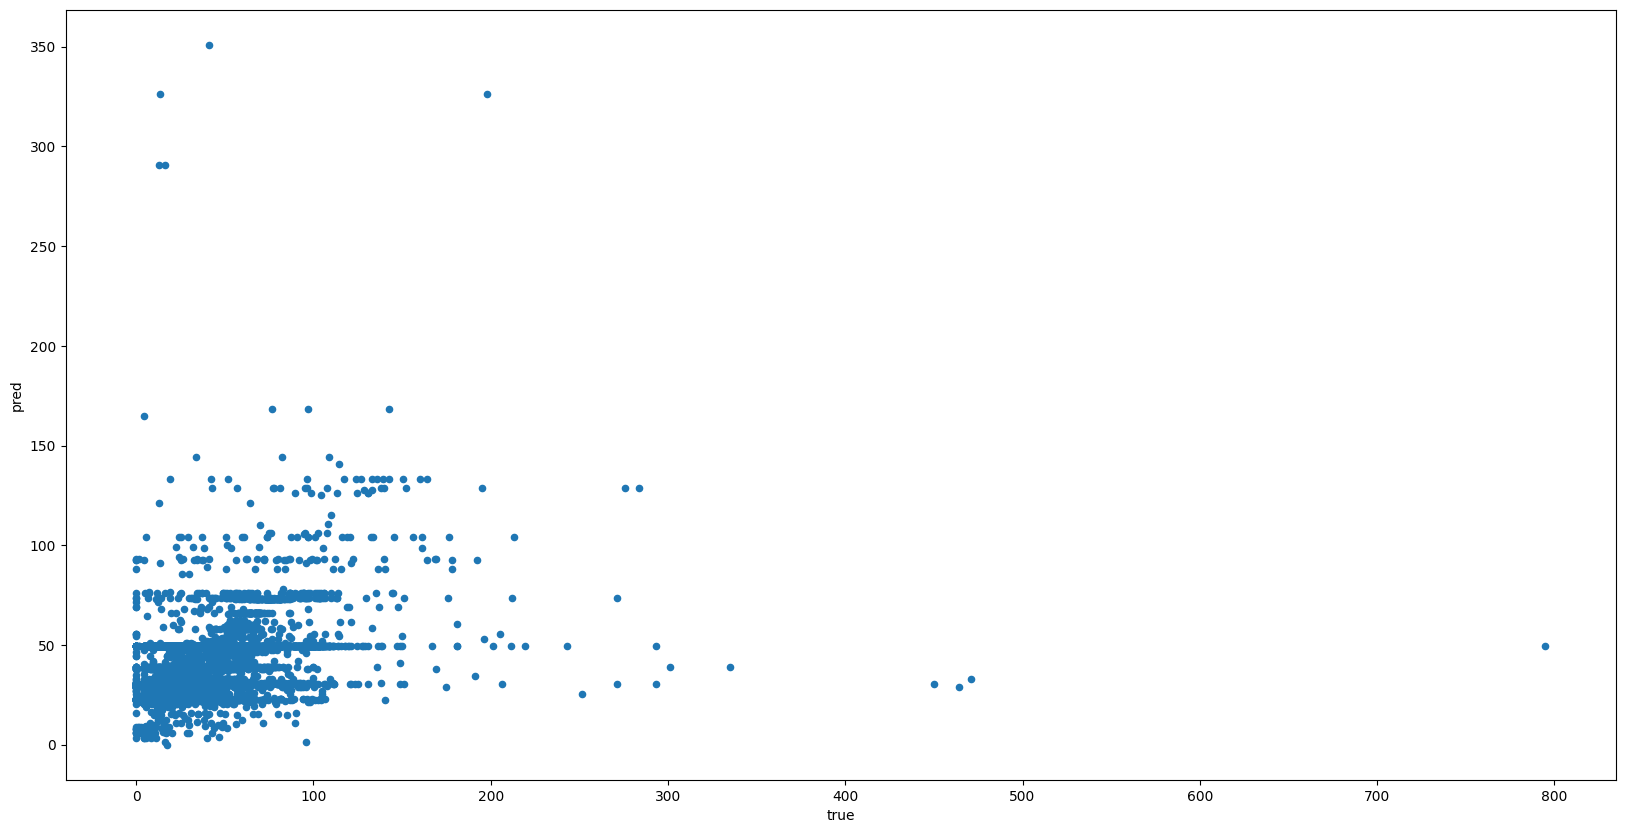

In [92]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

### Overfit <a id='overfit'></a>


The model fits the training data's pattern so much that it loses the ability to generalise.

In [93]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [94]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [95]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,2.738545e+01,21.052544
1,5,2.655614e+01,20.170903
2,8,2.573567e+01,20.576619
3,10,2.178991e+01,20.483217
4,15,1.535829e+01,21.357016
5,20,1.360291e+01,22.136557
6,30,1.043396e+01,24.012487
7,50,4.484383e+00,25.217315
8,70,9.238132e-01,25.336436
9,100,1.411984e-16,25.684405


Text(0, 0.5, 'root mean squared error')

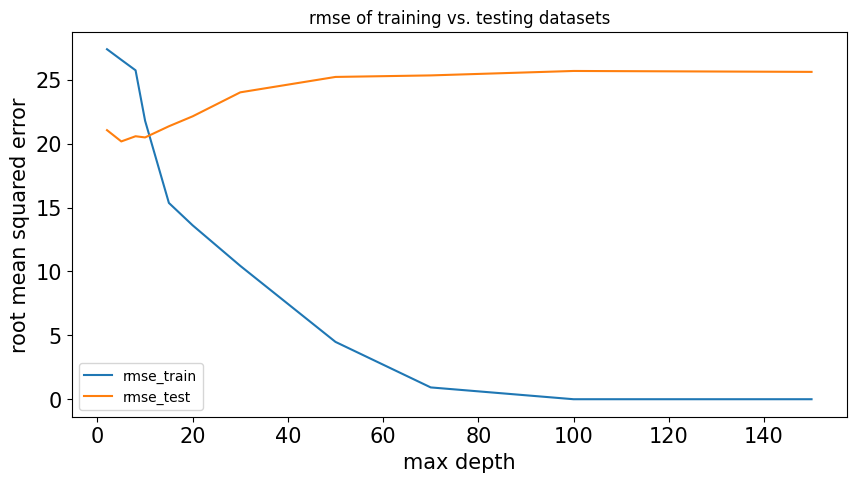

In [96]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

### Underfit <a id='underfit'></a>

Underfit is when the model cannot capture the data's pattern at all

In [97]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [98]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 12.936494646651989
mean_squared_error 787.6221974166598
root_mean_squared_error 28.064607558572057
r2 0.0965486422764481


## 7.2. Random forest <a id='random_forest'></a>


In [99]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [100]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.97798345882277
mean_squared_error 409.5508118239098
root_mean_squared_error 20.237361780229897
r2 0.27059144744972385


<Axes: xlabel='true', ylabel='pred'>

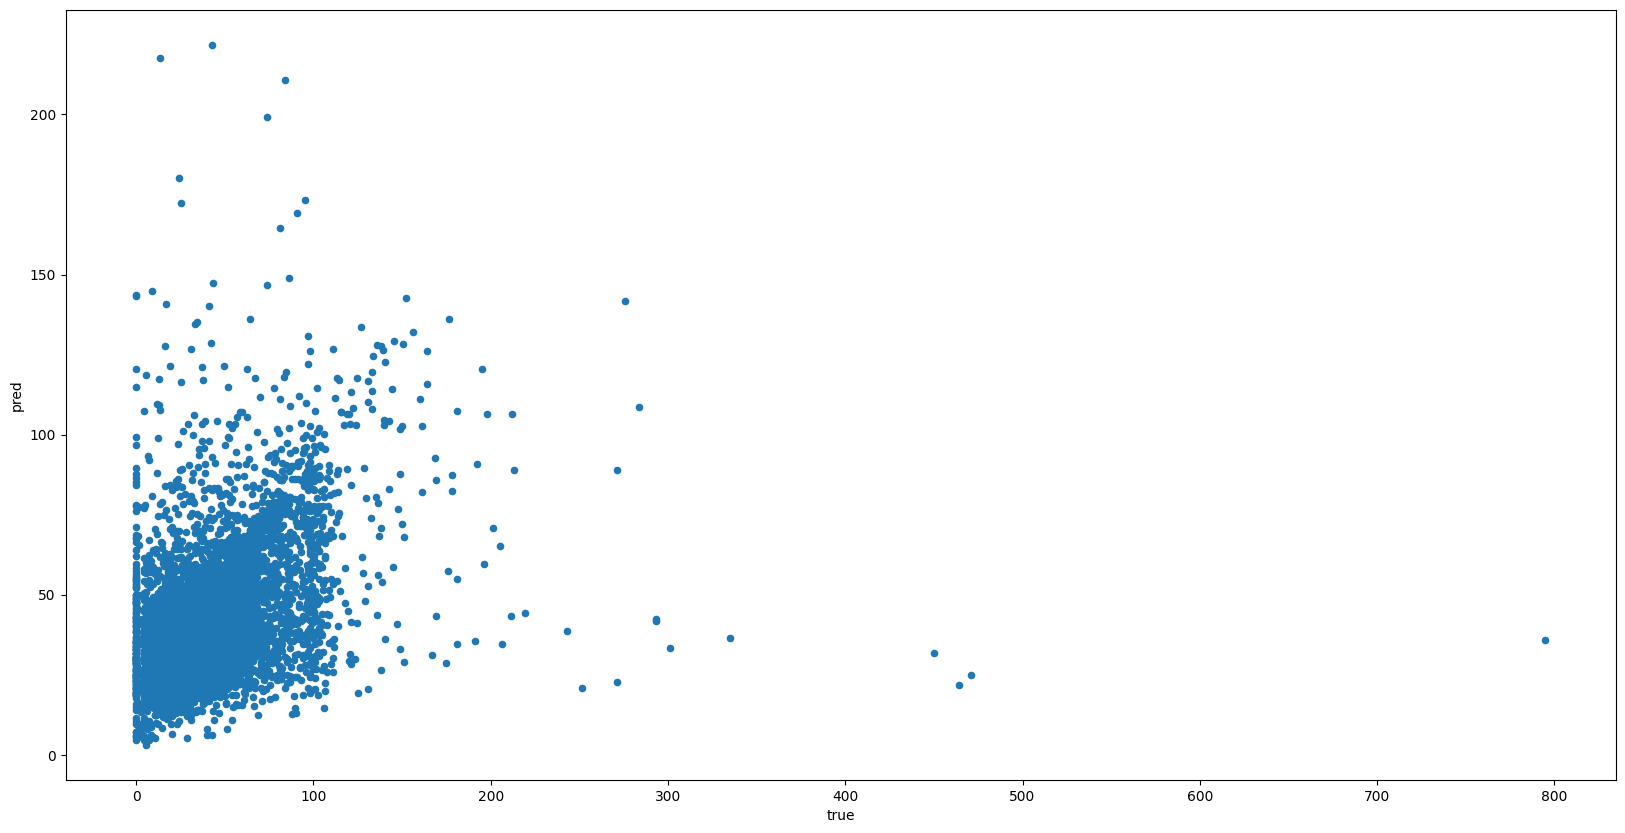

In [101]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## 7.3. Gradient boosting <a id='gradient_boosting'></a>

In [102]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [103]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 10.39167050967688
mean_squared_error 382.81415691115205
root_mean_squared_error 19.565637145545555
r2 0.31820933562604103


<Axes: xlabel='true', ylabel='pred'>

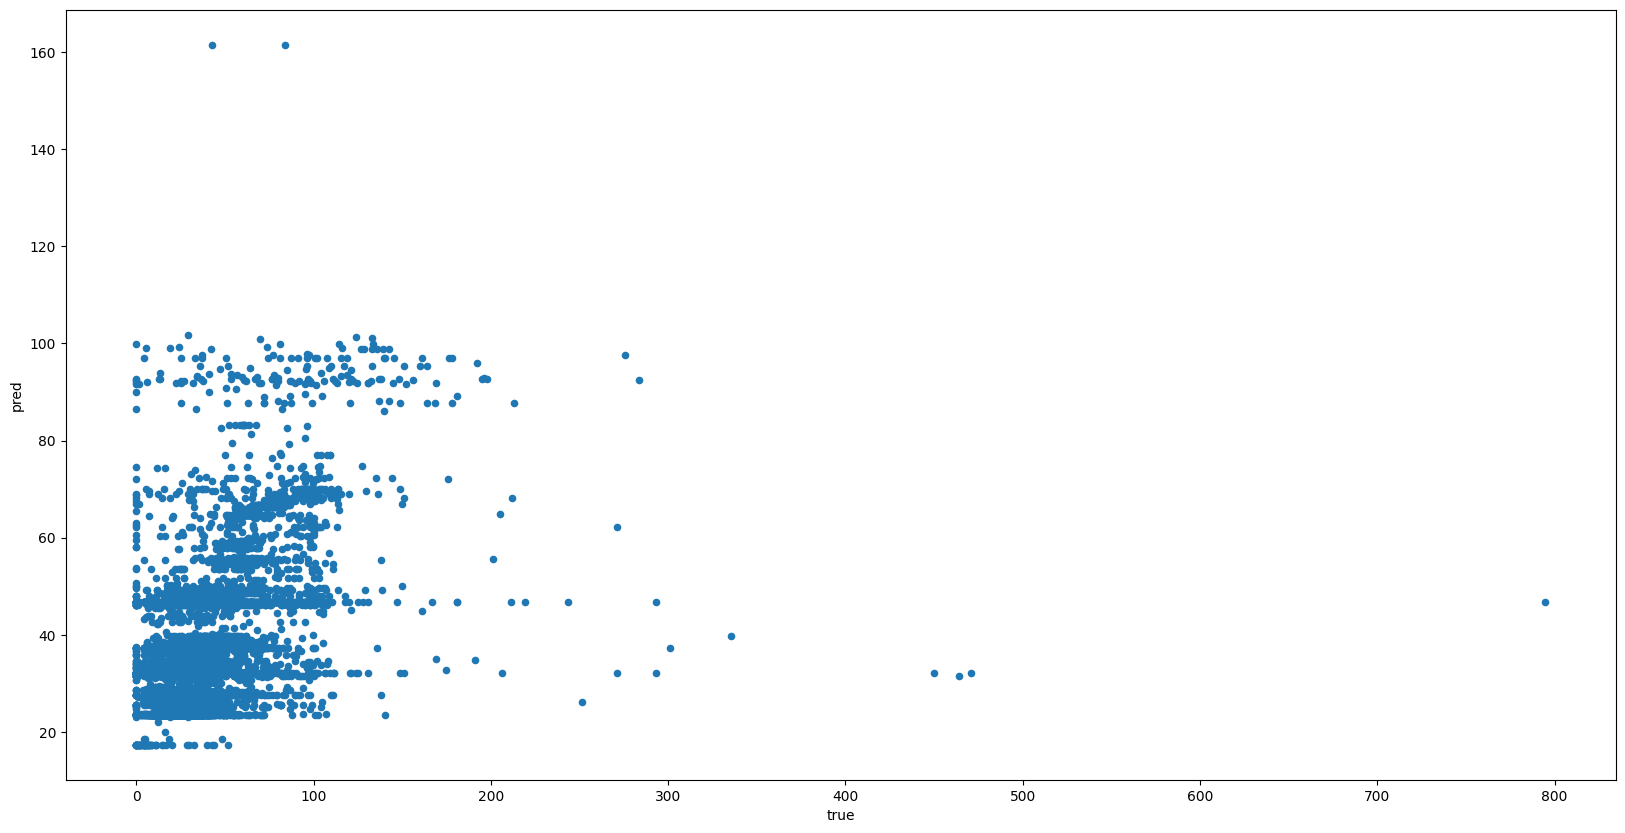

In [104]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

<Axes: >

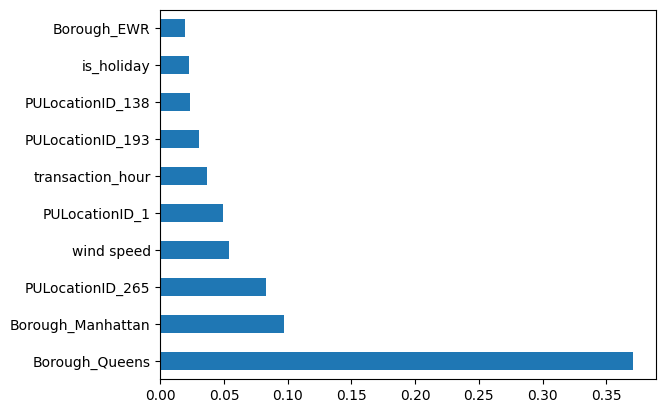

In [105]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 

# 8. Tuning <a id='tuning'></a>
[Back to top](#table_of_contents)
### 8.1. Find best parameters <a id='find_best_parameters'></a>

In [106]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [107]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


k-fold cross validation

In [108]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  16.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  16.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  16.8s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=40, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=40, n_estimators=400; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=40, n_estimators=400; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=20, min_samples_split=20, n_estimators

/opt/anaconda3/envs/dlenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/dlenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/dlenv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/dlenv/lib/python3.9/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/

In [109]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,59.292354,0.139925,4.966725,0.152816,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.298287,0.129215,0.333844,0.253782,0.089270,5
1,15.241698,0.486516,1.282821,0.193374,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.307066,0.122850,0.331682,0.253866,0.093186,4
2,21.294435,1.619160,1.002365,0.253956,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.310291,0.122541,0.340743,0.257858,0.096488,3
3,0.045432,0.004091,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,8
4,0.029853,0.004693,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,8
5,317.795826,1.174586,41.706768,1.734787,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.241452,0.121077,0.304033,0.222187,0.075924,6
6,67.998750,3.136179,2.781967,0.174224,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.253919,0.098677,0.282877,0.211824,0.080876,7
7,177.736693,3.093053,9.579191,0.247033,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.331615,0.132515,0.369672,0.277934,0.103994,1
8,0.155969,0.145282,0.000000,0.000000,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,8
9,117.567341,20.507163,8.855144,0.613067,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.328587,0.132813,0.350058,0.270486,0.097743,2


In [110]:
import time
t0= time.time()

best = RandomForestRegressor(n_estimators=600,min_samples_split= 10,
min_samples_leaf= 4,
max_features= 'sqrt',
max_depth= 300,
bootstrap= True)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  48.723912954330444  seconds
mean_absolute_error 9.747488992145215
mean_squared_error 370.49530915849965
root_mean_squared_error 19.24825470421928
r2 0.34014916006036


In [112]:
from sklearn.ensemble import RandomForestRegressor

import time
t0= time.time()

second_best = RandomForestRegressor(n_estimators=200,min_samples_split= 10,
min_samples_leaf= 2,
max_features= 'sqrt',
max_depth= 150,
bootstrap= True)
second_best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = second_best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

Time elapsed:  17.870604038238525  seconds
mean_absolute_error 9.71153065450968
mean_squared_error 372.41107105890273
root_mean_squared_error 19.29795510044789
r2 0.33673719486712583


<Axes: xlabel='true', ylabel='pred'>

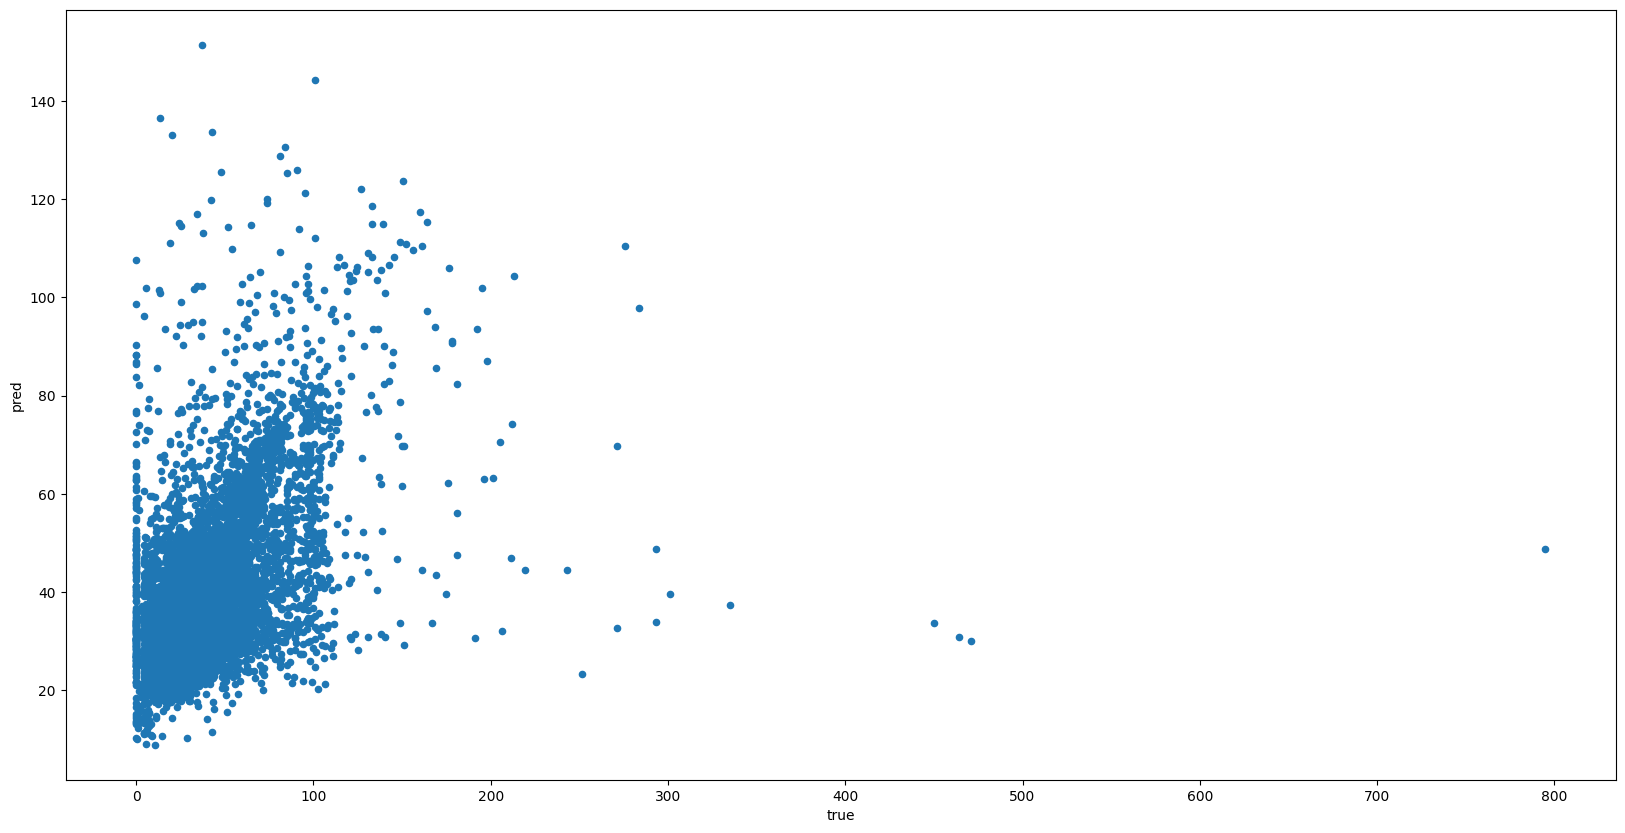

In [113]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

## Classification

<Axes: >

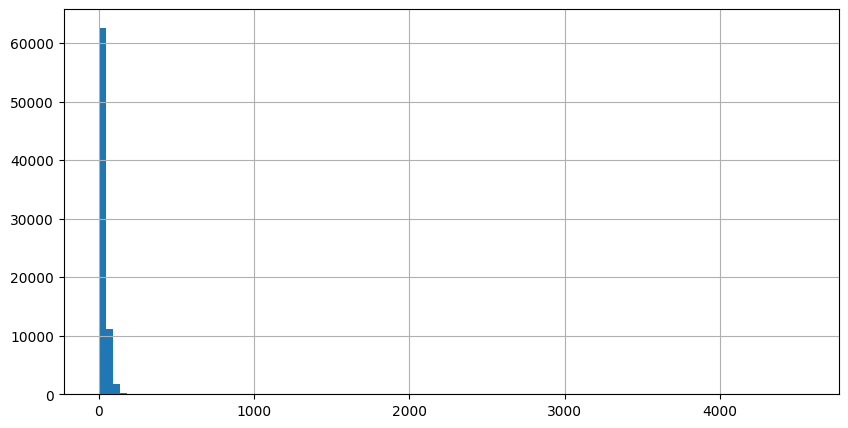

In [114]:
nyc_taxi_with_weather['total_amount'].hist(bins=100, figsize=(10,5))

In [115]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class['earning_class'] = nyc_taxi_with_weather['total_amount'].apply(lambda x: 'low' if x<=15 else 'high')
nyc_class['earning_class_binary'] = nyc_class['earning_class'].apply(lambda x: 0 if x=='low' else 1)
nyc_class.head()


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,1,2025-01-01,1,1,6,0.10,115.000,1,2,False,True,EWR,12.2,51.000000,9.0,0.7,0.446667,high,1
1,1,2025-01-01,1,1,9,0.00,132.510,4,2,False,True,EWR,12.2,51.000000,9.0,0.7,0.446667,high,1
2,1,2025-01-01,1,1,12,0.00,106.200,2,2,False,True,EWR,12.2,51.000000,9.0,0.7,0.446667,high,1
3,1,2025-01-01,1,1,13,1.00,41.300,4,2,False,True,EWR,12.2,51.000000,9.0,0.7,0.446667,high,1
4,1,2025-01-01,1,1,14,2.16,70.205,2,2,False,True,EWR,11.1,51.333333,10.0,0.7,0.437778,high,1


In [116]:
nyc_class['earning_class'].value_counts()

earning_class
high    69925
low      6046
Name: count, dtype: int64

In [117]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features + ['temperature', 'humidity', 'wind speed', 'cloud cover',
       'amount of precipitation']
target_feature = 'earning_class_binary'

In [118]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [119]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print('accuracy', accuracy_score(y_test_c, y_pred_c))
print('precision', precision_score(y_test_c, y_pred_c))
print('recall', recall_score(y_test_c, y_pred_c))

[[  245  1747]
 [  276 22803]]
accuracy 0.9193091619799769
precision 0.9288391038696537
recall 0.9880410763031328


<Axes: >

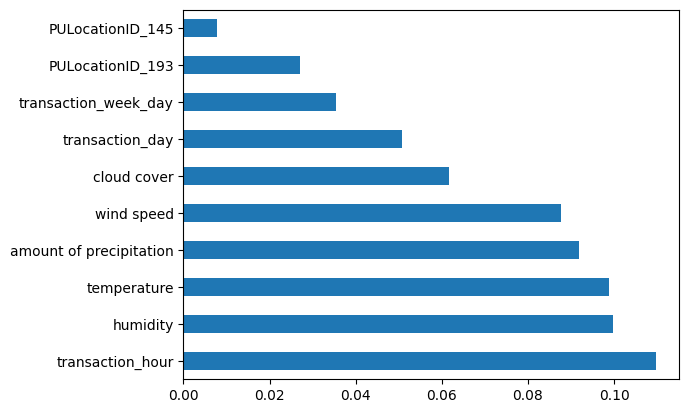

In [121]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind='barh')) 